In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math

Qs 3 

In [2]:
N = 6000
p = 10**-4 #0.0001
G = nx.erdos_renyi_graph(N, p, seed=5, directed=False)

# G = nx.erdos_renyi_graph(6000, 10**-4, seed=5, directed=False)
L = p*N*(N-1)*0.5
print(L)


1799.7


In [3]:
 avg_k = 2*L/N
print(avg_k)

0.5999


In [4]:
p_c = 1/(N-1)
print(p_c)

0.0001666944490748458


In [5]:
from scipy.stats import poisson
from scipy.special import factorial

def poisson_degree_distribution(G,p, number_of_bins=85, log_binning=True,):
    
    N = G.number_of_nodes()
    
    avg_k = p*(N-1)
    
    k = list(dict(G.degree()).values())
    kmax = np.max(k)   
    kmin = 0 
    bins = np.linspace(0, kmax+1, num=number_of_bins+1)
    # pmf = poisson.pmf(k, mu=avg_k)
    pmf = np.exp(avg_k)*np.power(avg_k, k)/factorial(k)
    # pmf = np.exp(avg_k)*np.power(avg_k, bins)/factorial(bins)
    print(len(pmf))
    # pmf = np.random.poisson(avg_k, size=n)
    probs, _ = np.histogram(pmf, bins)
    bins_out = bins[1:] - np.diff(bins)/2.0
    print(len(bins_out))
    return (k, pmf)



6000
85


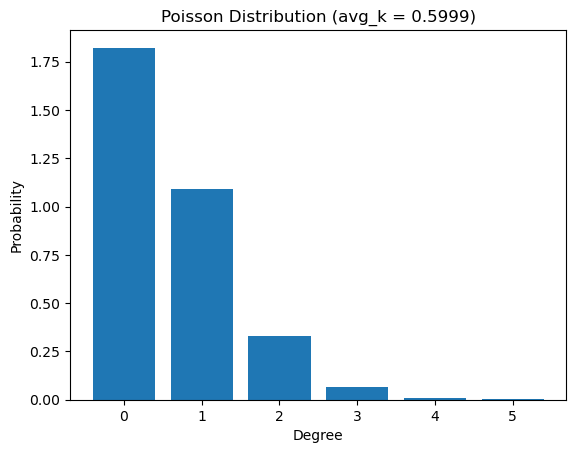

In [6]:
(x,y) = poisson_degree_distribution(G, p)
# plt.plot(t, d, 'bs')
# plt.show()

plt.bar(x, y)
plt.xlabel('Degree')
plt.ylabel('Probability')
plt.title('Poisson Distribution (avg_k = {})'.format(avg_k))
plt.show()

6000
85


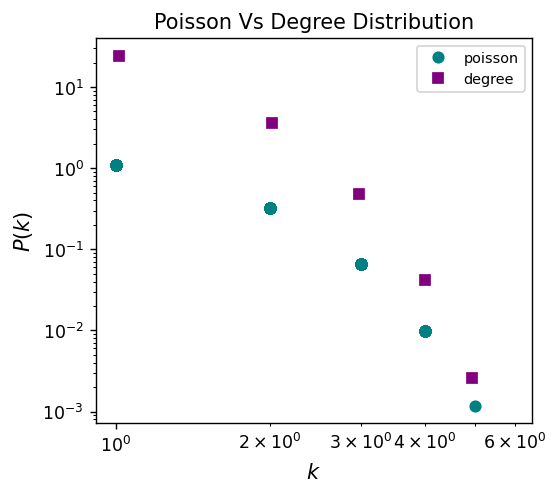

In [9]:
(x,y) = poisson_degree_distribution(G, p)
(x1,y1) = degree_distribution(G, number_of_bins=60, log_binning=True, density=True, directed=False)
fig, ax = plt.subplots(1,1,figsize=(4.5,4),dpi=125)
ax.loglog(x, y,marker='o',color='teal',lw=0, label='poisson');
ax.loglog(x1, y1, marker='s', color='purple', lw=0, label='degree');
ax.legend(fontsize='small')
ax.set_xlabel(r"$k$",fontsize='large')
ax.set_ylabel(r"$P(k)$",fontsize='large')
ax.set_title('Poisson Vs Degree Distribution')
plt.savefig('Poisson vs Deg.png', dpi=425, bbox_inches='tight')
plt.show()

Qs 4

In [10]:
G = nx.read_gml('airport-network.gml')

In [11]:
def degree_distribution(G, number_of_bins=15, log_binning=True, density=True, directed=False):

    # Step 0: Do we want the directed or undirected degree distribution?
    if directed:
        if directed=='in':
            k = list(dict(G.in_degree()).values()) # get the in degree of each node
        elif directed=='out':
            k = list(dict(G.out_degree()).values()) # get the out degree of each node
        else:
            out_error = "Help! if directed!=False, the input needs to be either 'in' or 'out'"
            print(out_error)
            # Question: Is this the correct way to raise an error message in Python?
            #           See "raise" function...
            return out_error
    else:
        k = list(dict(G.degree()).values()) # get the degree of each node


    # Step 1: We will first need to define the support of our distribution
    kmax = np.max(k)    # get the maximum degree
    kmin = 0            # let's assume kmin must be 0


    # Step 2: Then we'll need to construct bins
    if log_binning:
        # array of bin edges including rightmost and leftmost
        bins = np.logspace(0, np.log10(kmax+1), number_of_bins+1)
    else:
        bins = np.linspace(0, kmax+1, num=number_of_bins+1)


    # Step 3: Then we can compute the histogram using numpy
    probs, _ = np.histogram(k, bins, density=density)


    # Step 4: Return not the "bins" but the midpoint between adjacent bin
    #         values. This is a better way to plot the distribution.
    bins_out = bins[1:] - np.diff(bins)/2.0

    return bins_out, probs

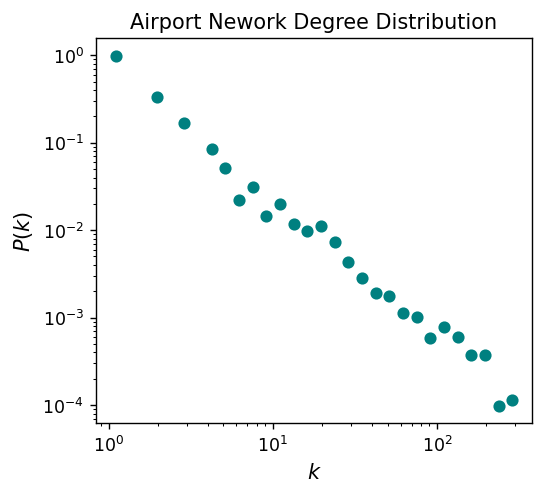

In [12]:
x, y = degree_distribution(G, number_of_bins=30, log_binning=True, density=True, directed=False)
fig, ax = plt.subplots(1,1,figsize=(4.5,4),dpi=125)
ax.loglog(x, y,marker='o',color='teal',lw=0);
ax.set_xlabel(r"$k$",fontsize='large')
ax.set_ylabel(r"$P(k)$",fontsize='large')
ax.set_title('Airport Nework Degree Distribution')
plt.savefig('Airport_dd_og.png', dpi=425, bbox_inches='tight')
plt.show()

In [13]:
def Global_clustering(G):
  w= nx.number_of_walks(G,2)
  df = pd.DataFrame(w)
  matrix = df.to_numpy()
  np.fill_diagonal(matrix, 0)
  ut = np.triu(matrix)
  triads = np.sum(ut)
  # print(triads)
  triangles = nx.triangles(G)
  triangles = sum(triangles.values())/3
  # print(triangles)
  global_clustering = (3*triangles)/triads
  return global_clustering

In [14]:
Global_clustering(G)

0.38414344664491556

In [15]:
nx.transitivity(G)

0.38414344664491556

In [16]:
# G_r = nx.random_reference(G)
n = G.number_of_nodes()
m = G.number_of_edges()

G_r = nx.gnm_random_graph(n,m)


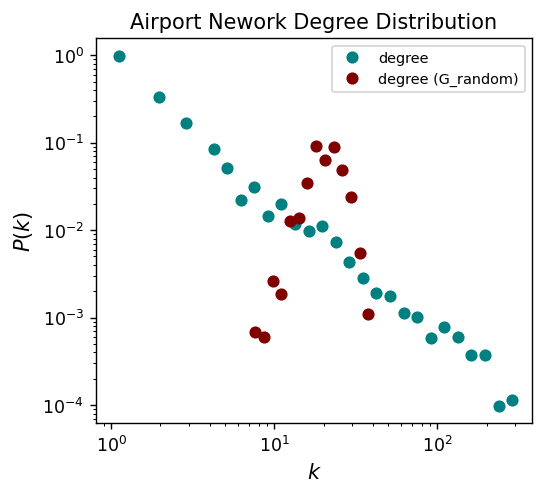

In [17]:
x, y = degree_distribution(G, number_of_bins=30, log_binning=True, density=True, directed=False)
x1, y1 = degree_distribution(G_r, number_of_bins=30, log_binning=True, density=True, directed=False)
fig, ax = plt.subplots(1,1,figsize=(4.5,4),dpi=125)
ax.loglog(x, y,marker='o',color='teal',label='degree',lw=0);
ax.loglog(x1, y1,marker='o',color='maroon',lw=0, label='degree (G_random)');
ax.legend(fontsize='small')
ax.set_xlabel(r"$k$",fontsize='large')
ax.set_ylabel(r"$P(k)$",fontsize='large')
ax.set_title('Airport Nework Degree Distribution')
plt.savefig('Airport_dd_random.png', dpi=425, bbox_inches='tight')
plt.show()

In [18]:
Global_clustering(G_r)

0.013805402737195768

In [19]:
#Degree preserving randomization from degree sequence 
from collections import Counter

def configuration_model_from_degree_sequence(degree_sequence, return_simple=True):

    # Check if the degree sequence is valid (sum of degrees must be even)
    if sum(degree_sequence) % 2 != 0:
        raise ValueError("The sum of the degree sequence must be even.")

    # Create stubs list: node i appears degree_sequence[i] times
    stubs = []
    for node, degree in enumerate(degree_sequence):
        stubs.extend([node] * degree)

    # Shuffle stubs to randomize the pairing process
    np.random.shuffle(stubs)

    # Initialize an empty multigraph
    G = nx.MultiGraph()

    # Add nodes to the graph
    G.add_nodes_from(range(len(degree_sequence)))

    # Pair stubs to create edges
    while stubs:
        u = stubs.pop()
        v = stubs.pop()

        # Add the edge to the graph
        G.add_edge(u, v)

    if return_simple:
        # Convert the multigraph to a simple graph (remove parallel edges and self-loops)
        G_simple = nx.Graph(G)  # This removes parallel edges and self-loops by default

        return G_simple

    else:
        return G

In [20]:
G_pr = configuration_model_from_degree_sequence(list(dict(G.degree()).values()),return_simple=True)


In [21]:
nx.transitivity(G_pr)

0.19142592504952302

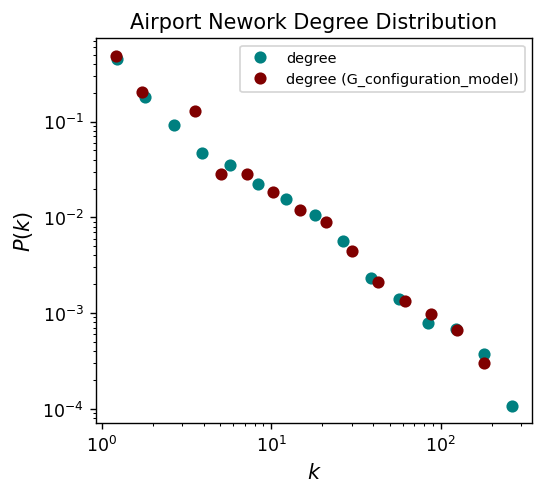

In [23]:
x, y = degree_distribution(G, number_of_bins=15, log_binning=True, density=True, directed=False)
x1, y1 = degree_distribution(G_pr, number_of_bins=15, log_binning=True, density=True, directed=False)
fig, ax = plt.subplots(1,1,figsize=(4.5,4),dpi=125)
ax.loglog(x, y,marker='o',color='teal',lw=0,label='degree');
ax.loglog(x1, y1,marker='o',color='maroon',lw=0, label='degree (G_configuration_model)');
ax.legend(fontsize='small')
ax.set_xlabel(r"$k$",fontsize='large')
ax.set_ylabel(r"$P(k)$",fontsize='large')
ax.set_title('Airport Nework Degree Distribution')
# plt.savefig('Airport_dd.png', dpi=425, bbox_inches='tight')
plt.show()

In [24]:
def degree_preserving_randomization(G, n_iter=1000):
    G_random = G.copy()
    edges = list(G_random.edges())
    num_edges = len(edges)

    for _ in range(n_iter):
        # Select two random edges (u, v) and (x, y)
        edge1_id = np.random.choice(list(range(len(edges))))
        u, v = edges[edge1_id]
        edge2_id = np.random.choice(list(range(len(edges))))
        x, y = edges[edge2_id]

        # Avoid selecting the same edge pair or creating self-loops
        if len({u, v, x, y}) == 4:
            # Swap the edges with some probability
            if np.random.rand() > 0.5:
                # Swap (u, v) with (u, y) and (x, v)
                if not (G_random.has_edge(u, y) or G_random.has_edge(x, v)):
                    G_random.remove_edge(u, v)
                    G_random.remove_edge(x, y)
                    G_random.add_edge(u, y)
                    G_random.add_edge(x, v)
            else:
                # Swap (u, v) with (u, x) and (v, y)
                if not (G_random.has_edge(u, x) or G_random.has_edge(v, y)):
                    G_random.remove_edge(u, v)
                    G_random.remove_edge(x, y)
                    G_random.add_edge(u, x)
                    G_random.add_edge(v, y)

        # Update edge list after changes
        edges = list(G_random.edges())


    return G_random

In [25]:
G_es = degree_preserving_randomization(G)

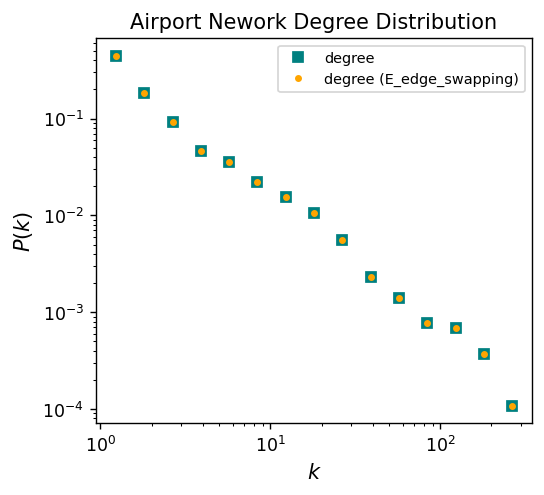

In [26]:
x, y = degree_distribution(G, number_of_bins=15, log_binning=True, density=True, directed=False)
x_1, y_1 = degree_distribution(G_es, number_of_bins=15, log_binning=True, density=True, directed=False)
fig, ax = plt.subplots(1,1,figsize=(4.5,4),dpi=125)
ax.loglog(x, y,marker='s',color='teal',lw=0, label='degree');
ax.loglog(x_1, y_1,marker='.',color='orange',lw=0,label='degree (E_edge_swapping)');
ax.legend(fontsize='small')
ax.set_xlabel(r"$k$",fontsize='large')
ax.set_ylabel(r"$P(k)$",fontsize='large')
ax.set_title('Airport Nework Degree Distribution')
plt.savefig('Airport_dd.png', dpi=425, bbox_inches='tight')
plt.show()

In [27]:
nx.transitivity(G_es)

0.35991551639402913

The Watts - Strogatz Model 

In [39]:
n = 1000
p = 0.0001
k = 2
G_w = nx.watts_strogatz_graph(n, k, p, seed=None)

In [40]:
C_avg = nx.average_clustering(G_w)

In [41]:
print(C_avg)

0.0


In [42]:
nx.clustering(G_w, 0)

0

In [44]:
P0 = nx.average_shortest_path_length(G_w)
C0 = 3/4

In [ ]:
def clustering_ws(p):
    C0 = 3/4
    G = nx.watts_strogatz_graph(n, k, p, seed=None)
    C_avg = nx.average_clustering(G)
    C = C_avg/C0

In [122]:
C0 = 0.75
n= 1000
k=20
# listp = [0, 1, 20]
# listp = np.linspace(0.0001, 1, 30)
listp = np.logspace(-4, 0, 30)
# print(listp)
C_ = []
for p in listp:
    G = nx.watts_strogatz_graph(n, k, p, seed=None)
    C_avg = nx.average_clustering(G)
    # print(C_avg)
    C = C_avg/C0
    # print(C)
    C_.append(C)

# C = C_avg/C0


In [114]:
# C_

In [123]:
n= 1000
k=20
G0 = nx.watts_strogatz_graph(n,k,p=0, seed=None) 
d0 = nx.average_shortest_path_length(G0)
d_ = []
for p in listp:
    G = nx.watts_strogatz_graph(n, k, p, seed=None)
    d_avg = nx.average_shortest_path_length(G)
    # print(C_avg)
    d = d_avg/d0
    # print(C)
    d_.append(d)


In [125]:
d_

[1.0,
 0.728092652259332,
 0.7589328094302553,
 0.7076024361493124,
 0.5120732416502947,
 0.5507415324165029,
 0.5092428290766208,
 0.3919071119842829,
 0.3381296660117878,
 0.3582183889980353,
 0.296129115913556,
 0.2652866011787819,
 0.24857461689587426,
 0.2109152848722986,
 0.21531944990176816,
 0.1906654616895874,
 0.172334931237721,
 0.1650175245579568,
 0.15521587426326128,
 0.1417786247544204,
 0.1359010609037328,
 0.1304465225933202,
 0.12493406679764243,
 0.11897642436149311,
 0.11443261296660116,
 0.11097029469548134,
 0.10767834970530452,
 0.10543834970530451,
 0.10401178781925344,
 0.10366420432220039]

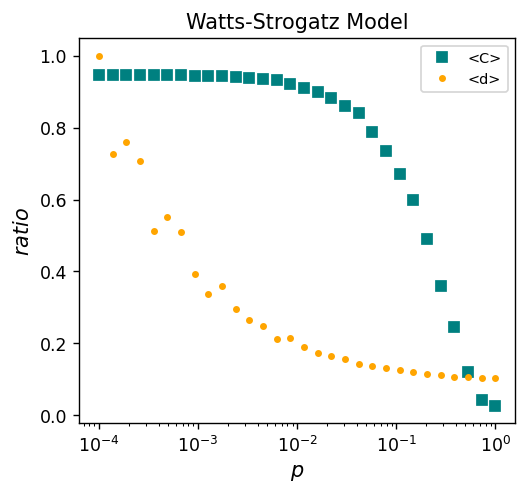

In [129]:
x = listp

y1 = C_
y2 = d_

fig, ax = plt.subplots(1,1,figsize=(4.5,4),dpi=125)
ax.plot(x, y1,marker='s',color='teal',lw=0, label='<C>');
ax.plot(x, y2,marker='.',color='orange',lw=0,label='<d>');
ax.set_xscale('log')


ax.legend(fontsize='small')
ax.set_xlabel(r"$p$",fontsize='large')
ax.set_ylabel(r"$ratio$",fontsize='large')
ax.set_title('Watts-Strogatz Model')
plt.savefig('watts-strogatz.png', dpi=425, bbox_inches='tight')
plt.show()

In [33]:
# pos = nx.circular_layout(G)
# plt.figure(figsize=(10, 8))
# nx.draw(G, pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=30, font_size=6, arrowsize=10)
# plt.title("W-S Network")
# plt.show()